### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

Vamos praticar o conteúdo que foi apresentado na aula a partir de algumas atividades, porém usando um conjunto de dados diferente com dados de pacientes a serem diagnosticados com diabetes ou não.

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [91]:
import pandas as pd

In [92]:
dados = pd.read_csv('.\\diabetes.csv')

In [93]:
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


#### Realizando a divisão dos dados em variáveis explicativas e variável alvo (x e y)

In [94]:
x = dados.drop('diabetes', axis=1)
y = dados['diabetes']

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x, x_teste, y, y_teste = train_test_split(x, y, stratify = y, test_size = 0.05, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)


In [97]:
print(f'Quantidade total de registros: {len(dados)}')
print(f'Quantidade de registros no conjunto de validação: {len(x_teste)}')
print(f'Quantidade de registros após a seraçao do conjunto de validação: {len(dados) - len(x_teste)}')
print(f'Quantidade de registros no conjunto de treino: {len(x_treino)}')
print(f'Quantidade de registros no conjunto de teste: {len(x_val)}')

Quantidade total de registros: 394
Quantidade de registros no conjunto de validação: 20
Quantidade de registros após a seraçao do conjunto de validação: 374
Quantidade de registros no conjunto de treino: 280
Quantidade de registros no conjunto de teste: 94


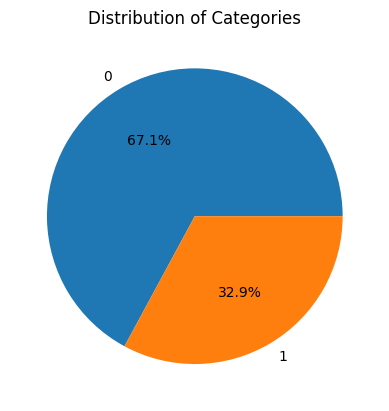

In [98]:
import matplotlib.pyplot as plt
y.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Categories')
plt.show()


### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

Decision Tree (Árvore de Decisão):

* Estrutura: Uma única árvore de decisão que divide os dados de forma recursiva com base nas características mais informativas, criando uma estrutura hierárquica de decisões.

* Complexidade: Tende a ser mais simples, mas pode facilmente overfit, especialmente se a árvore for muito profunda.
  
* Interpretação: Fácil de interpretar e visualizar, pois é uma única árvore que mostra o caminho de decisão claro para cada previsão.

* Variabilidade: Suscetível a alta variância, já que pequenas alterações nos dados de treinamento podem resultar em árvores completamente diferentes.


Random Forest (Floresta Aleatória):

* Estrutura: Conjunto (ensemble) de muitas árvores de decisão (geralmente centenas ou milhares) onde cada árvore é construída a partir de uma amostra aleatória dos dados e características.

* Complexidade: Mais complexo que uma única árvore de decisão, mas reduz o risco de overfitting combinando as predições de várias árvores.

* Interpretação: Menos intuitivo para interpretação direta porque as predições são baseadas na média ou maioria das predições das várias árvores, dificultando a visualização de uma "árvore de decisão" clara.
  
* Variabilidade: Reduz a variabilidade e melhora a generalização ao agregar resultados de várias árvores, tornando-o mais robusto a ruídos nos dados de treinamento.

Em resumo, enquanto uma Decision Tree é simples e fácil de interpretar, ela pode facilmente sofrer de overfitting. 

O Random Forest, por outro lado, é um método ensemble que combina muitas árvores de decisão para melhorar a robustez e a capacidade de generalização, embora seja mais complexo e menos transparente.

#### DecisionTreeClassifier

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
arvore = DecisionTreeClassifier(max_depth=3, random_state=5)

arvore.fit(x_treino, y_treino)

print(f'Acurácia nos dados de treino: {arvore.score(x_treino, y_treino)}')
print(f'Acuraácia nos dados de teste: {arvore.score(x_val, y_val)}')

Acurácia nos dados de treino: 0.7571428571428571
Acuraácia nos dados de teste: 0.776595744680851


#### RandomForestClassifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
random_forest = RandomForestClassifier(max_depth=4,random_state=5)

random_forest.fit(x_treino, y_treino)

print(f'Acurácia nos dados de treino: {random_forest.score(x_treino, y_treino)}')
print(f'Acuraácia nos dados de teste: {random_forest.score(x_val, y_val)}')

Acurácia nos dados de treino: 0.8464285714285714
Acuraácia nos dados de teste: 0.723404255319149


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#### Matiz de confusão DecisionTreeClassifier

In [110]:
#armezenando os dados previstos para os dados de validação
y_previsto = arvore.predict(x_val)

#criando a matriz de confusão para verificar a quantidade de acertos e erros do modelo
# Comparando os dados previstos com os dados de validação (dados reais)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[52 11]
 [10 21]]


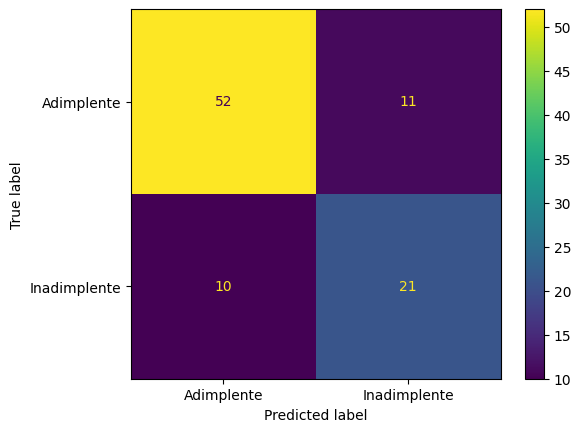

In [111]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

#### Matriz de confusão RandomForestClassifier

In [112]:
#armezenando os dados previstos para os dados de validação
y_previsto_random = random_forest.predict(x_val)

#criando a matriz de confusão para verificar a quantidade de acertos e erros do modelo
# Comparando os dados previstos com os dados de validação (dados reais)
matriz_confusao = confusion_matrix(y_val, y_previsto_random)
print(matriz_confusao)

[[54  9]
 [17 14]]


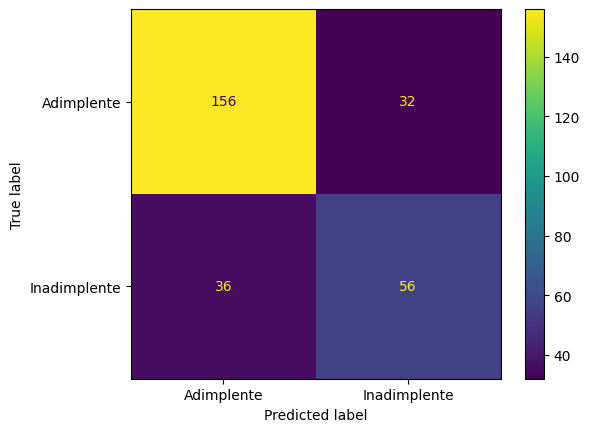

In [107]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [113]:
from sklearn.metrics import accuracy_score

print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')
print(f'Acurácia: {accuracy_score(y_val, y_previsto_random)}')

Acurácia: 0.776595744680851
Acurácia: 0.723404255319149


In [115]:
from sklearn.metrics import precision_score, recall_score
print(f'Precisão DecisionTree: {precision_score(y_val, y_previsto)}')
print(f'Recall DecisionTree: {recall_score(y_val, y_previsto)}')

Precisão DecisionTree: 0.65625
Recall DecisionTree: 0.6774193548387096


In [116]:
print(f'Precisão RandomForest: {precision_score(y_val, y_previsto_random)}')
print(f'Recall RandomForest: {recall_score(y_val, y_previsto_random)}')

Precisão RandomForest: 0.6086956521739131
Recall RandomForest: 0.45161290322580644


In [118]:
from sklearn.metrics import f1_score
print(f'F1-score DecisionTree: {f1_score(y_val, y_previsto)}')

print(f'F1-score RandomForest: {f1_score(y_val, y_previsto_random)}')

F1-score DecisionTree: 0.6666666666666666
F1-score RandomForest: 0.5185185185185185


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

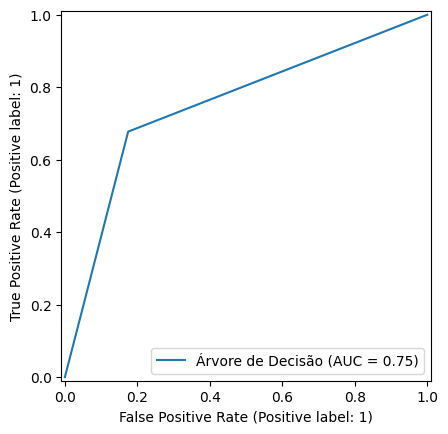

In [119]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

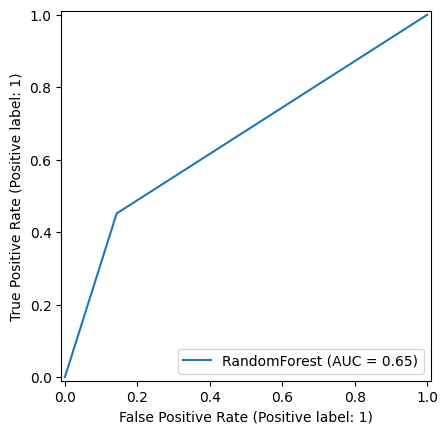

In [120]:
RocCurveDisplay.from_predictions(y_val, y_previsto_random, name = 'RandomForest');

In [121]:
from sklearn.metrics import roc_auc_score

Área Sob a Curva ROC (AUC - Area Under the Curve)
A AUC é um valor numérico que resume a performance do modelo. Ela representa a área total sob a curva ROC. A AUC varia de 0 a 1:

AUC = 1: Indica um modelo perfeito que classifica corretamente todas as instâncias.

AUC = 0.5: Indica um modelo que não tem poder discriminatório, equivalente a uma classificação aleatória.

AUC < 0.5: Indica um modelo pior que o aleatório, o que pode sugerir que os sinais de classe estão invertidos.

In [123]:
print(f'Arvore de Decisão AUC: {roc_auc_score(y_val, y_previsto)}')

print(f'Random Forest AUC: {roc_auc_score(y_val, y_previsto_random)}')

Arvore de Decisão AUC: 0.7514080901177674
Random Forest AUC: 0.6543778801843319


### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

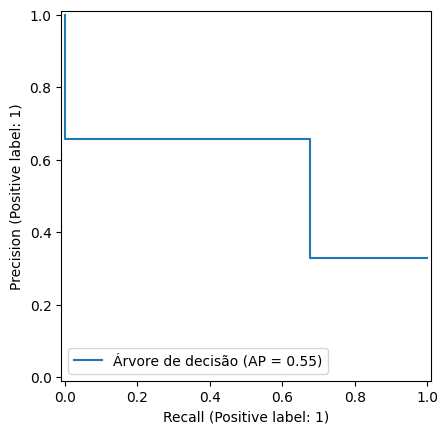

In [125]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

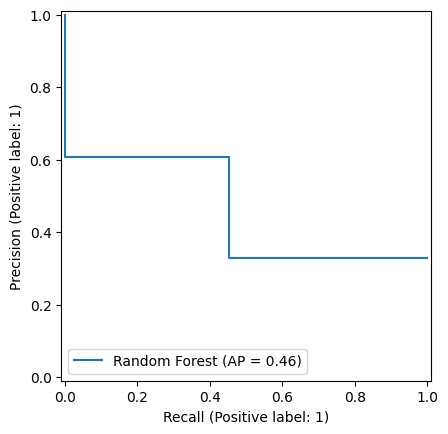

In [126]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto_random, name = 'Random Forest');

In [128]:
from sklearn.metrics import average_precision_score

print(f'AP Arvore de decisao: {average_precision_score(y_val, y_previsto)}')

print(f'AP Random Forest: {average_precision_score(y_val, y_previsto)}')

AP Arvore de decisao: 0.5509394303363074
AP Random Forest: 0.5509394303363074


### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94



In [131]:
print(classification_report(y_val, y_previsto_random))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        63
           1       0.61      0.45      0.52        31

    accuracy                           0.72        94
   macro avg       0.68      0.65      0.66        94
weighted avg       0.71      0.72      0.71        94



# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.